<a href="https://colab.research.google.com/github/SRIBALAJI00/FrameWork-Lab/blob/main/FDVA_EXP_0_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
//EXP 0
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

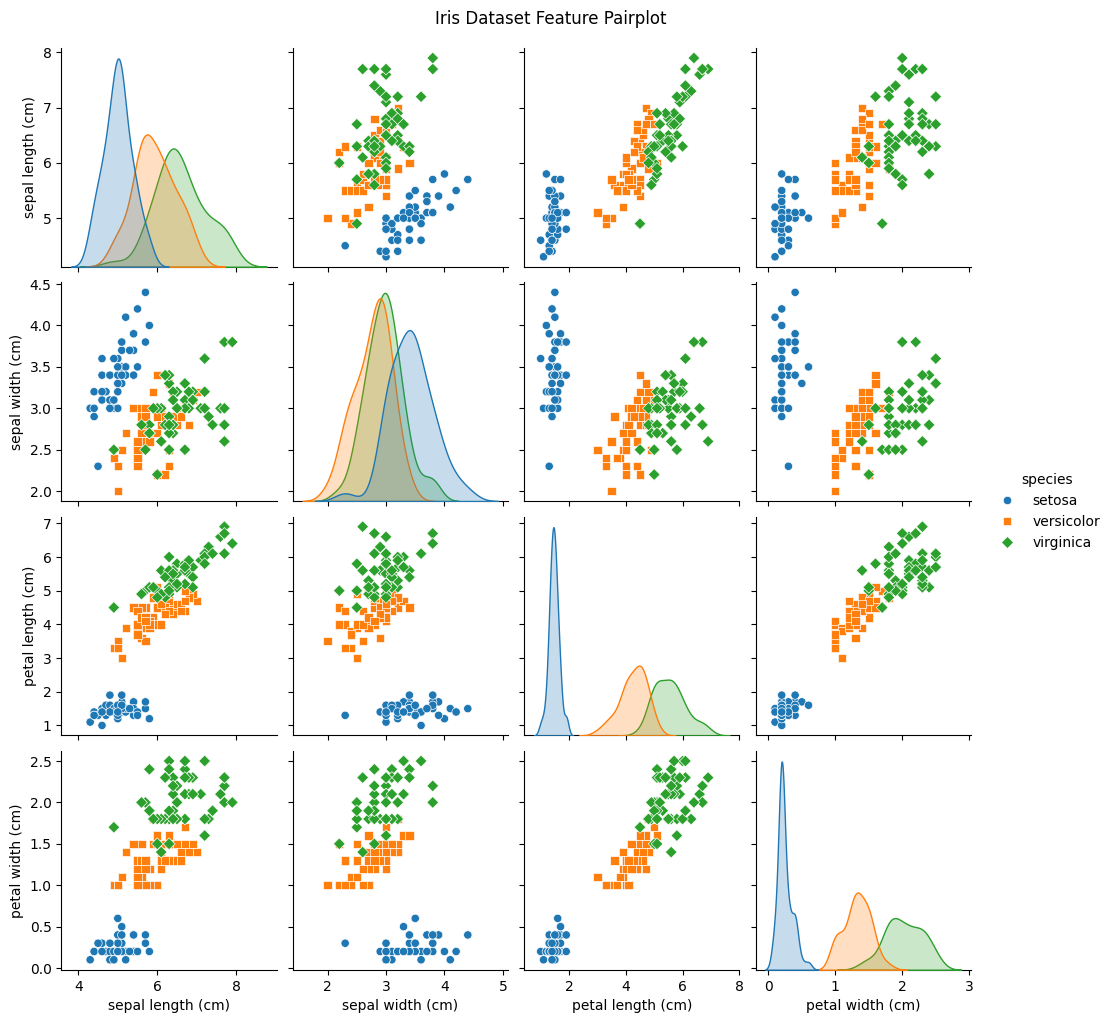

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
df = pd.DataFrame(X, columns=feature_names)
df['species'] = pd.Categorical.from_codes(y, target_names)
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.suptitle("Iris Dataset Feature Pairplot", y=1.02)
plt.show()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [ ]:
print(f"Accuracy on test set: {accuracy_score(y_test, y_pred)*100:.2f}%")

Accuracy on test set: 100.00%


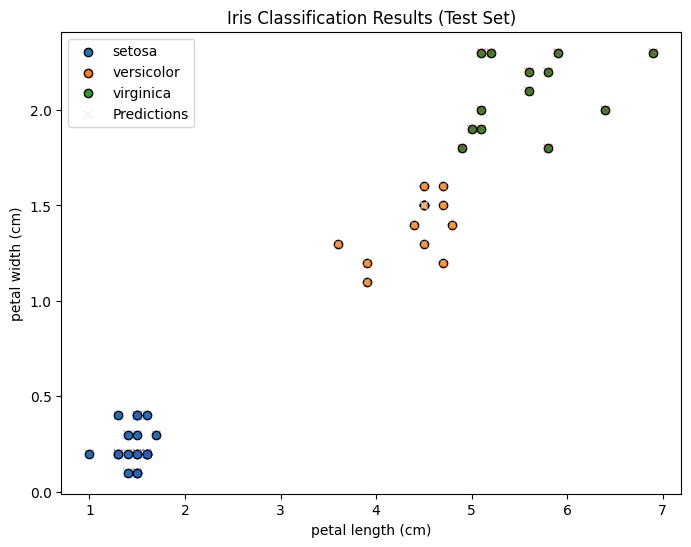

In [ ]:
feature_x = 2
feature_y = 3
plt.figure(figsize=(8,6))
for species_index, species_name in enumerate(target_names):
    plt.scatter(
        X_test[y_test == species_index, feature_x],
        X_test[y_test == species_index, feature_y],
        label=species_name,
        edgecolor='k'
    )
plt.scatter(
    X_test[:, feature_x],
    X_test[:, feature_y],
    c=y_pred,
    cmap='coolwarm',
    alpha=0.3,
    marker='x',
    label='Predictions'
)

plt.xlabel(feature_names[feature_x])
plt.ylabel(feature_names[feature_y])
plt.title('Iris Classification Results (Test Set)')
plt.legend()
plt.show()


In [ ]:
#exp1
import ipywidgets as widgets
from IPython.display import display, clear_output

slider = widgets.IntSlider(
    value=5,
    min=0,
    max=20,
    step=1,
    description='Slider:',
    continuous_update=True
)

dropdown = widgets.Dropdown(
    options=['Python', 'Java', 'C++', 'Kotlin'],
    value='Python',
    description='Language:'
)

checkbox = widgets.Checkbox(
    value=False,
    description='Enable Option'
)

text_box = widgets.Text(
    value='Type here...',
    description='Input:'
)

button = widgets.Button(
    description="Submit",
    button_style='success'
)
output = widgets.Output()

def on_button_click(b):
    with output:
        clear_output()
        print(" Your Selection:")
        print(f"Slider Value: {slider.value}")
        print(f"Language: {dropdown.value}")
        print(f"Option Enabled: {checkbox.value}")
        print(f"Text Input: {text_box.value}")

button.on_click(on_button_click)

ui = widgets.VBox([
    slider,
    dropdown,
    checkbox,
    text_box,
    button,
    output
])
display(ui)




In [ ]:
#exp2
import pandas as pd
import sqlite3
from io import StringIO
from google.colab import files
import requests


In [ ]:
# ======================
# 1. Import from CSV (in-memory string)
# ======================
csv_data = """Name,Age,City
John,28,New York
Jane,34,London
Mike,25,Sydney"""
df_csv = pd.read_csv(StringIO(csv_data))
print("CSV Data:")
print(df_csv)


CSV Data:
   Name  Age      City
0  John   28  New York
1  Jane   34    London
2  Mike   25    Sydney


In [ ]:
# ======================
# 2. Import from Excel (create sample Excel from df)
# ======================
df_csv.to_excel("sample.xlsx", index=False)
df_excel = pd.read_excel("sample.xlsx")
print("\nExcel Data:")
print(df_excel)



Excel Data:
   Name  Age      City
0  John   28  New York
1  Jane   34    London
2  Mike   25    Sydney


In [ ]:
# ======================
# 3. Import from SQLite
# ======================
conn = sqlite3.connect(':memory:')
df_csv.to_sql('people', conn, index=False, if_exists='replace')
df_sql = pd.read_sql("SELECT * FROM people", conn)
print("\nSQL Data:")
print(df_sql)


SQL Data:
   Name  Age      City
0  John   28  New York
1  Jane   34    London
2  Mike   25    Sydney


In [ ]:
# ======================
# 4. Import from Web (Wikipedia HTML table)
# ======================
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
headers = {"User-Agent": "Mozilla/5.0"}

In [ ]:
# Fetch page with headers
req = requests.get(url, headers=headers)


In [ ]:
# Parse with StringIO to avoid FutureWarning
dfs = pd.read_html(StringIO(req.text))

In [ ]:
gdp_table = None
for i, df in enumerate(dfs):
    if df.columns.astype(str).str.contains("GDP").any() or "GDP" in df.to_string():
        gdp_table = df
        print(f"\nPicked table index: {i}")
        break

if gdp_table is None:
    gdp_table = dfs[0]  # fallback

print("\nWeb Data (Top 5 Rows):")
print(gdp_table.head())




Picked table index: 0

Web Data (Top 5 Rows):
                                                   0
0  Largest economies in the world by GDP (nominal...


In [ ]:
# ======================
# 5. Export DataFrame to Excel
# ======================
df_sql.to_excel("exported_output.xlsx", index=False)
files.download("exported_output.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving StudentsPerformance - StudentsPerformance.csv to StudentsPerformance - StudentsPerformance (1).csv
File uploaded: StudentsPerformance - StudentsPerformance (1).csv

Original data types:
 gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

Converted data types:
 gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object


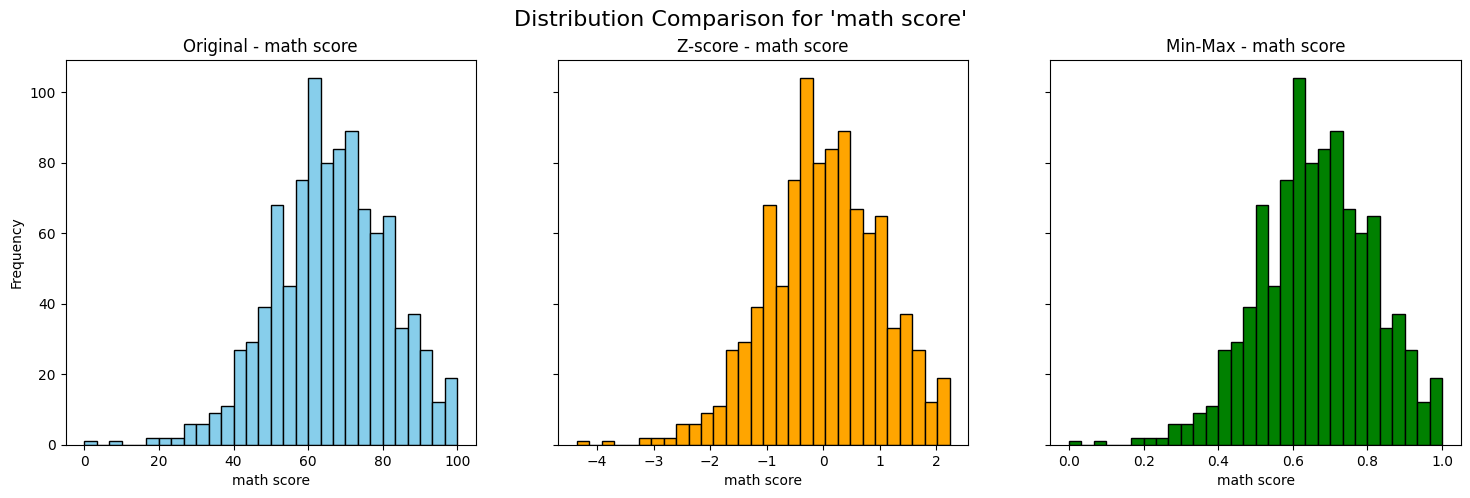

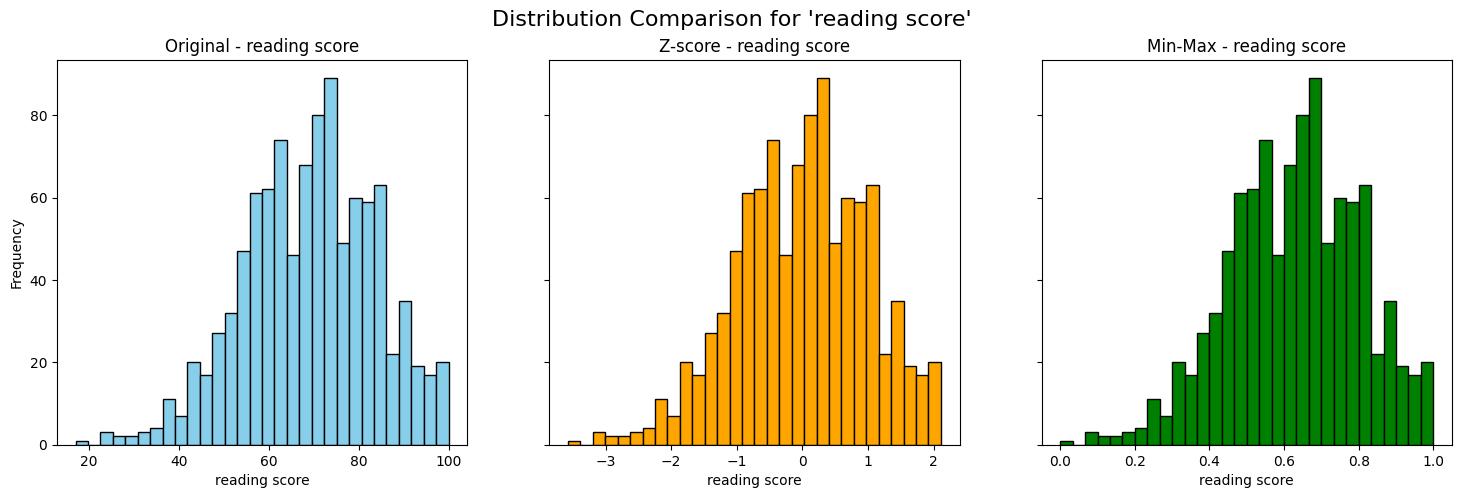

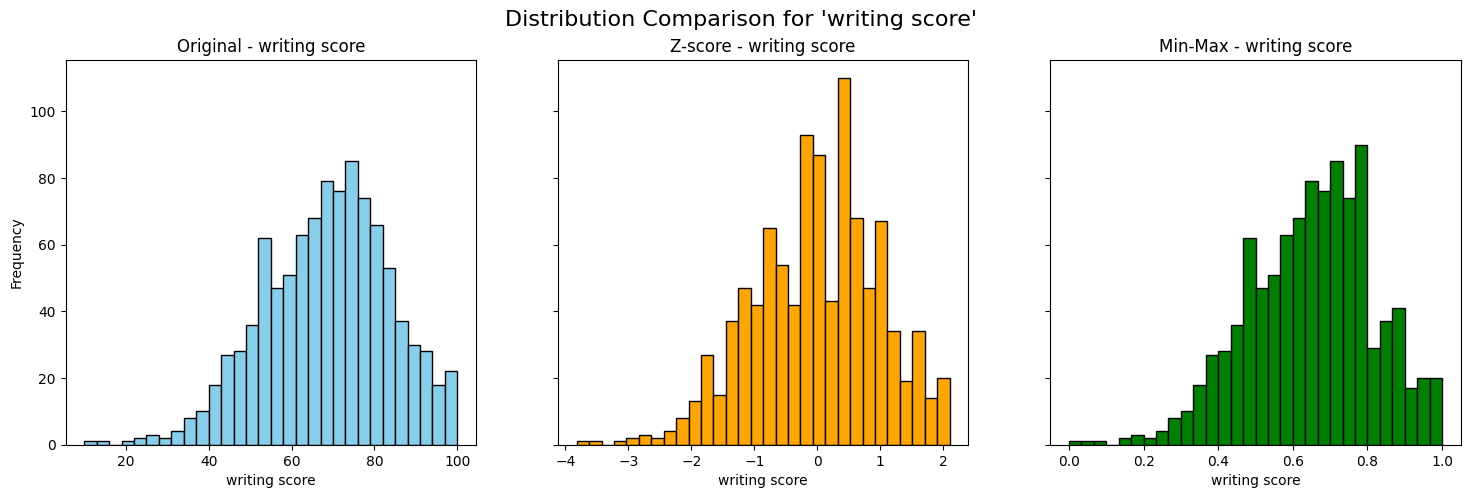

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
print(f"File uploaded: {filename}")
df = pd.read_csv(filename)
df.head()



for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())




df.drop_duplicates(inplace=True)



print("\nOriginal data types:\n", df.dtypes)




df['math score'] = df['math score'].astype(float)
df['reading score'] = df['reading score'].astype(float)
df['writing score'] = df['writing score'].astype(float)
print("\nConverted data types:\n", df.dtypes)




numeric_cols = ['math score', 'reading score', 'writing score']
df_original = df[numeric_cols].copy()




from sklearn.preprocessing import StandardScaler
import pandas as pd
scaler = StandardScaler()
df_zscore = pd.DataFrame(scaler.fit_transform(df_original), columns=numeric_cols)




from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
df_minmax = pd.DataFrame(minmax.fit_transform(df_original), columns=numeric_cols)




import matplotlib.pyplot as plt
for col in numeric_cols:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

    axes[0].hist(df_original[col], bins=30, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Original - {col}")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Frequency")

    axes[1].hist(df_zscore[col], bins=30, color='orange', edgecolor='black')
    axes[1].set_title(f"Z-score - {col}")
    axes[1].set_xlabel(col)

    axes[2].hist(df_minmax[col], bins=30, color='green', edgecolor='black')
    axes[2].set_title(f"Min-Max - {col}")
    axes[2].set_xlabel(col)

    plt.suptitle(f"Distribution Comparison for '{col}'", fontsize=16)
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

df = sns.load_dataset("tips")
df.head()
df.head()
df.tail()
df.sample(5)
df.info()
df.shape
df.columns
df.describe(include='all')
df[df['total_bill'] > 20]
df[(df['total_bill'] > 20) & (df['sex'] == 'Male')]
df.loc[df['day'].isin(['Sat','Sun']), ['total_bill','tip','day','sex']]
df.query("size >= 3")[['total_bill','size','tip']]
numeric_df = df.select_dtypes(include=np.number)

summary = pd.DataFrame({
    "Mean": numeric_df.mean(),
    "Median": numeric_df.median(),
    "Mode": df.mode().iloc[0][numeric_df.columns],
    "Range": numeric_df.max() - numeric_df.min(),
    "Variance": numeric_df.var(),
    "Std Dev": numeric_df.std()
})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


Saving StudentsPerformance.csv to StudentsPerformance.csv
✅ Dataset Loaded Successfully!
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


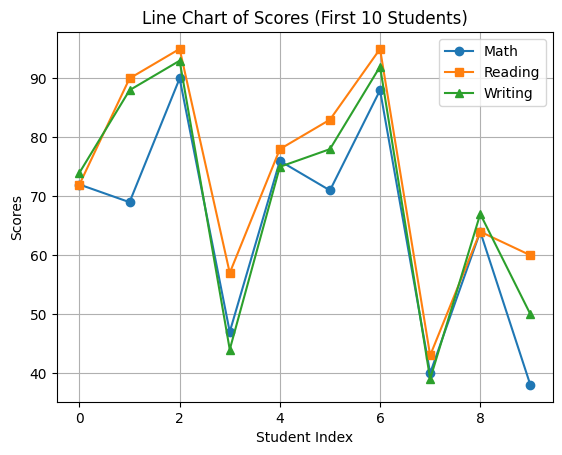

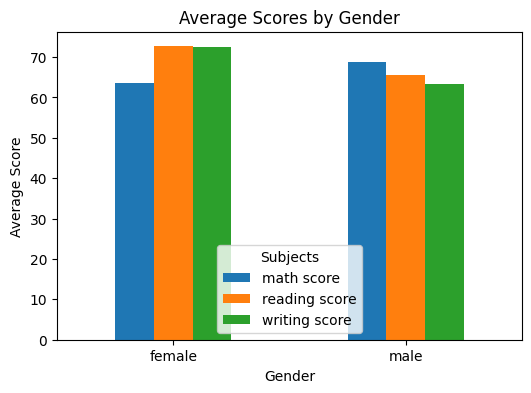

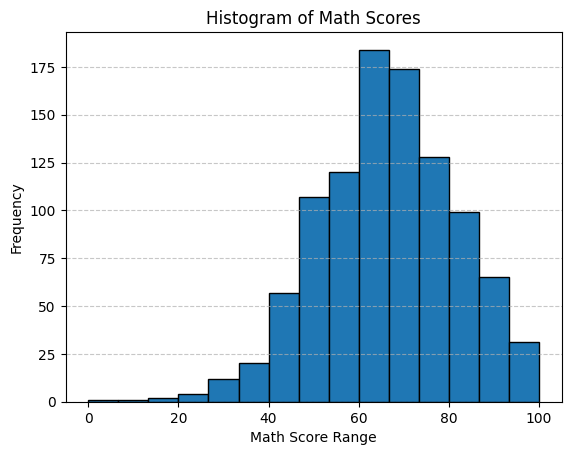

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Ask user to upload dataset
uploaded = files.upload()

# Get the uploaded file name
filename = list(uploaded.keys())[0]

# Load dataset
df = pd.read_csv(filename)
print("✅ Dataset Loaded Successfully!")
print(df.head())

# ===============================
# Line Chart for First 10 Students
# ===============================
df_head = df.head(10)
plt.plot(df_head.index, df_head["math score"], marker='o', label="Math")
plt.plot(df_head.index, df_head["reading score"], marker='s', label="Reading")
plt.plot(df_head.index, df_head["writing score"], marker='^', label="Writing")

plt.title("Line Chart of Scores (First 10 Students)")
plt.xlabel("Student Index")
plt.ylabel("Scores")
plt.legend()
plt.grid(True)
plt.show()

# ===============================
# Average Scores by Gender
# ===============================
avg_scores = df.groupby("gender")[["math score", "reading score", "writing score"]].mean()
avg_scores.plot(kind="bar", figsize=(6,4))

plt.title("Average Scores by Gender")
plt.ylabel("Average Score")
plt.xlabel("Gender")
plt.legend(title="Subjects")
plt.xticks(rotation=0)
plt.show()

# ===============================
# Histogram of Math Scores
# ===============================
plt.hist(df["math score"], bins=15, edgecolor="black")

plt.title("Histogram of Math Scores")
plt.xlabel("Math Score Range")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
